In [2]:
#load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#data loading
df = pd.read_csv("US_Accidents.csv", low_memory=False)

In [4]:
#select features from data we want to use (they are all numerical features)
numerical_features = ['Distance(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Visibility(mi)', 'Temperature(F)', 'Humidity(%)']

#select target
target = 'Severity'

In [5]:
#drop rows w/missing values
df = df.dropna(subset=numerical_features + [target])

#drop rows w/duplicate values
df = df.drop_duplicates(subset=numerical_features + [target])

In [6]:
#sample 5% of the data in our data frame for faster computation
df = df.sample(frac=0.05, random_state=42)

In [7]:
#extract features and target
X = df[numerical_features]
y = df[target]

In [8]:
#data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
#optimize k with train-validation split
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

In [11]:
#range of k values to test with
k_values = range(1, 100, 2)  

#remembers score to compare k values
cv_scores = []

In [12]:
#loops through k values to find optimal k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_part, y_train_part)
    score = accuracy_score(y_val, knn.predict(X_val))
    cv_scores.append(score)

In [13]:
#find the optimal k
optimal_k = k_values[np.argmax(cv_scores)]
print(f"The optimal number of neighbors is {optimal_k}")

The optimal number of neighbors is 59


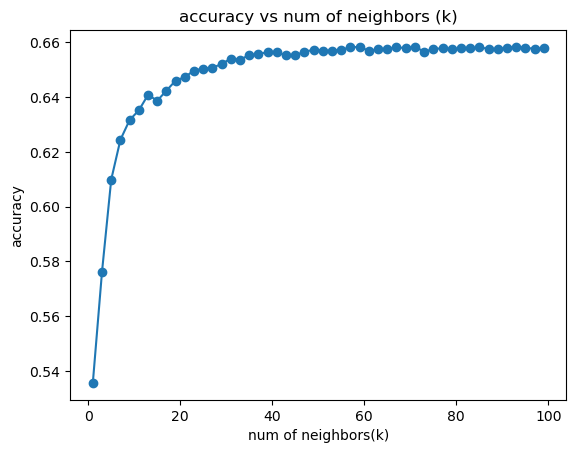

In [14]:
#plot elbow graph
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('num of neighbors(k)')
plt.ylabel('accuracy')
plt.title('accuracy vs num of neighbors (k)')
plt.show()

#shows us how the optimal num of ks is around 20-40 before it plateaus

In [15]:
#make model w/optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=59)

In [16]:
#evalute w/test set
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Final Accuracy with k={optimal_k}: {accuracy:.2f}')

Final Accuracy with k=59: 0.67
